## 문제: k-Means 클러스터링

```sklearn.datasets.make_blobs```를 사용하여 데이터를 생성한다.
```
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)
```

이 데이터를 4개의 클러스터로 군집화하세요.
Python으로 구현해서 클러스터링하는데, 앞서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.
(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

Parameters
* n_samples: 샘플 갯수 (기본 값은 100)
* n_features: features 갯수 (기본 값은 2)
* centers: 중심점 갯수
* cluster_std: 클러스터 표준편차 (기본 값은 1.0)
* random_state: 기본 값은 None
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

반환:
* X 배열 [n_samples, n_features]
* y: 배정된 클러스터 The generated samples.

In [6]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [12]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # print ("Distance {:.3f} between {} and {}".format(distJI, centroids[j], x[i]))
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # print ("Centroids updated: \n", _centroids)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [13]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

아래 데이터로 실행해보자.
데이터의 초기 중심점으로 결과가 다르게 나올 수 있다는 점에 유의하자.

In [17]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

함수를 약간 수정해야 한다.
cluster함수의 3번째 줄을 아래와 같이 수정해야 한다.

```python
clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
```

In [18]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])



====== Iteration 1 ======
.....Assigning [0.669787   3.59540802] to 2th centroid by 1.390
.....Assigning [-2.02396992  7.99569054] to 1th centroid by 0.976
.....Assigning [1.43289271 4.37679234] to 2th centroid by 0.681
.....Assigning [1.06923853 4.53068484] to 2th centroid by 1.071
.....Assigning [1.71444449 5.02521524] to 2th centroid by 1.064
.....Assigning [0.74387399 4.12240568] to 2th centroid by 1.262
.....Assigning [-2.04363942  4.06392123] to 0th centroid by 1.431
.....Assigning [-0.67860329  7.88799076] to 1th centroid by 2.324
.....Assigning [-0.04749204  5.47425256] to 2th centroid by 2.523
.....Assigning [-1.46976488  7.69183251] to 1th centroid by 1.561
.....Assigning [-0.86417686  6.86528639] to 1th centroid by 2.419
.....Assigning [-1.84838498  6.90859736] to 1th centroid by 1.587
.....Assigning [-1.27182547  7.13460392] to 1th centroid by 1.933
.....Assigning [-0.93428978  7.73253222] to 1th centroid by 2.083
.....Assigning [-0.73415741  7.44484466] to 1th centroid b

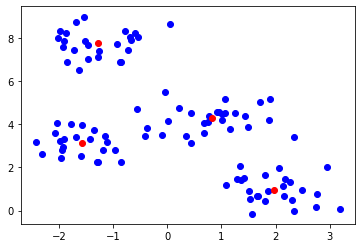

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

k = 4
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)